In [1]:
import torch
import numpy as np
import re
import matplotlib.pyplot as plt


import torch
import re
import numpy as np

def load_data_to_tensor(file_path):
    # 读取数据
    data_list = []

    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(r'bs=(\d+)\s*, dimX=(\d+)\s*, DY=(\d+)\s*, N=(\d+)\s*, K=(\d+)\s*, TIME=\s*([\d.]+)ms', line)
            if match:
                bs, dimX, DY, N, K, time = map(float, match.groups())
                data_list.append([bs, dimX, DY, N, K, time])

    # 转换为 PyTorch Tensor
    data_array = np.array(data_list)  # shape: (N, 6)

    # 提取唯一值，确定 Tensor 形状
    bs_vals = np.unique(data_array[:, 0])
    dimX_vals = np.unique(data_array[:, 1])
    DY_vals = np.unique(data_array[:, 2])
    N_vals = np.unique(data_array[:, 3])
    K_vals = np.unique(data_array[:, 4])

    # 创建 5D Tensor，并初始化为 NaN
    tensor_shape = (len(bs_vals), len(dimX_vals), len(DY_vals), len(N_vals), len(K_vals))
    tensor_data = torch.full(tensor_shape, float('nan'), dtype=torch.float32)

    # 映射参数值到索引
    def get_index(val, arr):
        return np.where(arr == val)[0][0]

    # 填充数据
    for row in data_array:
        bs_idx = get_index(row[0], bs_vals)
        dimX_idx = get_index(row[1], dimX_vals)
        DY_idx = get_index(row[2], DY_vals)
        N_idx = get_index(row[3], N_vals)
        K_idx = get_index(row[4], K_vals)
        tensor_data[bs_idx, dimX_idx, DY_idx, N_idx, K_idx] = row[5]  # 存 TIME
    # print(tensor_data.shape)
    tensor_data = tensor_data.permute(1, 2, 3, 0, 4).reshape(2, 2, 15, 16)
    return tensor_data, bs_vals, dimX_vals, DY_vals, N_vals, K_vals

file_path = [
			'exp_data/1D_A', 
			'exp_data/1D_B', 
			'exp_data/1D_C', 
			'exp_data/1D_D', 
			'exp_data/1D_E']
data = []
# plt.figure(figsize=(20, 4))

for file in file_path:
	tensor_data, bs_vals, dimX_vals, DY_vals, N_vals, K_vals = load_data_to_tensor(file)
	data.append(tensor_data)
print(type(data))

<class 'list'>


In [ ]:

# print(data)
min_data = data[0]
for i in range(len(data) - 1):
	min_data = torch.min(min_data, data[i])
performance_ratio =  data[-1] / min_data
# for i in range(1, len(performance_ratio)):
# 	if performance_ratio[i] > 1.6:
# 		print(data[0][i], data[1][i, -1])
# 	# print(performance_ratio[i])
# print(min_data.shape)
# perf_ratio = min_data /
# print(min_data.shape)

torch.Size([2, 2, 15, 16])


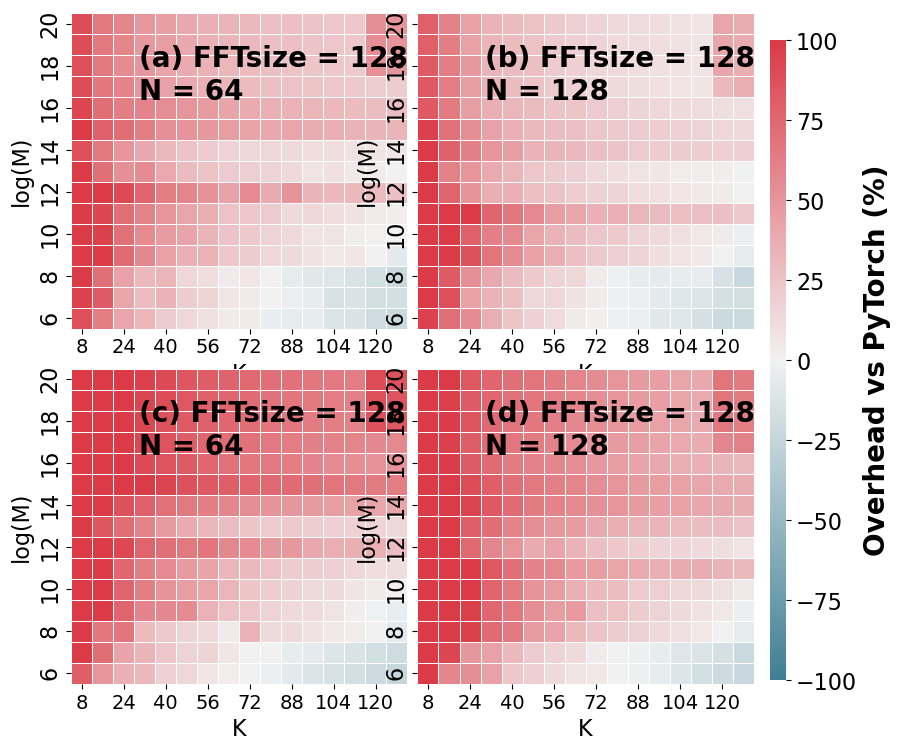

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8),)
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0.03)
bd = 100
import seaborn as sns
import matplotlib.pyplot as plt
import torch as th
# 设置为 Type1 字体
fontsize = 20
plt.rcParams['pdf.fonttype'] = 42  # Type1 字体
plt.rcParams['ps.fonttype'] = 42   # Type1 字体

# plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=16,)
label = [
    '(a) FFT size = 128\nN = 64',
    '(b) FFT size  = 128\nN = 128',
    '(c) FFT size  = 128\nN = 64',
    '(d) FFT size = 128\nN = 128',
]
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cbar_ax = fig.add_axes([.96, .1, .02, .8], label='Overhead vs cuFFT (%)')
for i in range(2):
	for j in range(2):
		heatmap = (performance_ratio[i, j]) * 100 - 100
		sns_plot = sns.heatmap(heatmap, cmap=cmap, 
						 vmax=bd, vmin=-bd,center=0,
	# sns_plot = sns.heatmap((TurboFFT[i]/cuFFT[i]) * 100 - 100, cmap=cmap, vmax=50, center=0,
			square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
			ax=ax[i, j],
			cbar_ax=cbar_ax if i == 0 else None, cbar=i == 0)
	# print(vkFFT[:30, :30].shape)
		ax[i, j].invert_yaxis()
cbar_ax.set_ylabel('Overhead vs PyTorch (%)', fontdict={'fontsize': fontsize, 'weight': 'bold'})
# fig.colorbar(ax.get_children()[0], orientation="horizontal")

for i in range(2):
	b = 0.1
	ax[i, 0].text(.1 + b, .9, label[i * 2], ha='left', va='top', transform=ax[i, 0].transAxes, fontsize=fontsize, fontdict={'weight': 'bold'})
	ax[i, 1].text(.1 + b, .9, label[i * 2 + 1], ha='left', va='top', transform=ax[i, 1].transAxes, fontsize=fontsize, fontdict={'weight': 'bold'})
	# ax[i, 0].text(.45 + b, .8, precision[i], ha='left', va='top', transform=ax[i, 0].transAxes, fontsize=fontsize, fontdict={'weight': 'bold'})
	# ax[i, 1].text(.425 + b, .8, precision[i], ha='left', va='top', transform=ax[i, 1].transAxes, fontsize=fontsize, fontdict={'weight': 'bold'})
	for j in range(2):
		b = 0.5
		# ax[i, j].set_yticks([0 + b, 4 + b, 9+ b, 14+ b, 19+ b, 24+ b])
		# ax[i, j].set_yticklabels([1, 5, 10, 15, 20, 25])
		ax[i, j].set_yticks([i + b for i in range(0, 16, 2)])
		ax[i, j].set_yticklabels([i + 6 for i in range(0, 16, 2)])
		
		ax[i, j].set_xticks([i + b for i in range(0, 16, 2)])
		ax[i, j].set_xticklabels([(i + 1) * 8 for i in range(0, 16, 2)], fontsize=14)
		
		ax[i, j].set_ylabel('log(M)')
		ax[i, j].set_xlabel('K')
